In [ ]:
Nama            : Muhammad Hanafi Ibsan
Email Dicoding  : hanafi2048@gmail.com
Asal Kota       : Medan

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d chrisfilo/fruit-recognition

100% 7.91G/7.92G [03:07<00:00, 44.4MB/s]
100% 7.92G/7.92G [03:07<00:00, 45.4MB/s]


In [ ]:
cp '/content/fruit-recognition.zip' '/tmp'

In [ ]:
import os
import zipfile
local_zip = '/tmp/fruit-recognition.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/')

['Banana',
 'initgoogle_syslog_dir.0',
 'dap_multiplexer.2595d616be48.root.log.INFO.20210728-145216.54',
 'dap_multiplexer.INFO',
 'debugger_2eeht636gf',
 'fruit-recognition.zip',
 'Apple',
 'Orange',
 'tmplascwq45.py',
 '__pycache__']

In [ ]:
# import splitfolders
base_dir = '/tmp'
#splitfolders.ratio(base_dir, output = '/tmp/COVID-19_Radiography_Dataset', seed = 1337, ratio = (.8, .2))

In [ ]:
import shutil

shutil.rmtree('/tmp/Pitaya')
shutil.rmtree('/tmp/Pear')
shutil.rmtree('/tmp/Tomatoes')
shutil.rmtree('/tmp/muskmelon')
shutil.rmtree('/tmp/Persimmon')
shutil.rmtree('/tmp/Pomegranate')
shutil.rmtree('/tmp/Peach')
shutil.rmtree('/tmp/Mango')
shutil.rmtree('/tmp/Kiwi')
shutil.rmtree('/tmp/Guava')
shutil.rmtree('/tmp/Carambola')
shutil.rmtree('/tmp/Plum')


In [ ]:
orange_dir = os.path.join (base_dir, 'Orange')
apple_dir = os.path.join (base_dir, 'Apple')
banana_dir = os.path.join (base_dir, 'Banana')


In [ ]:
train_dir = os.path.join('/tmp')
validation_dir = os.path.join('/tmp')

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
train_orange_dir, validation_orange_dir = train_test_split (os.listdir (orange_dir), test_size = 0.2)
train_apple_dir, validation_apple_dir = train_test_split (os.listdir (apple_dir), test_size = 0.2)
train_banana_dir, validation_banana_dir = train_test_split (os.listdir (banana_dir), test_size = 0.2)


In [ ]:
train_orange = os.path.join (train_dir, 'Orange')
train_apple = os.path.join (train_dir, 'Apple')
train_banana = os.path.join (train_dir, 'Banana')

validation_orange = os.path.join (validation_dir, 'Orange')
validation_apple = os.path.join (validation_dir, 'Apple')
validation_banana = os.path.join (validation_dir, 'Banana')


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 93% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    #horizontal_flip=True,
                    #zoom_range=0.2,
                    #shear_range=0.2,
                    fill_mode = 'nearest')
                    #validation_split=0.2) # set validation split

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    #horizontal_flip=True,
                    #zoom_range=0.2,
                    #shear_range=0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=16,
        class_mode='categorical')
        #subset='training' # set as training data

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=16,
        class_mode='categorical')
        #subset='validation') # set as validation data

Found 17224 images belonging to 5 classes.
Found 17224 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.layers[0].trainable = False

In [ ]:
"""
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
"""

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00001, decay=0.01)
model.compile(loss='categorical_crossentropy',  metrics=['accuracy'], optimizer=opt)

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 5, 5, 2048)        58331648  
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 2048)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               26214912  
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 1285      
Total params: 84,679,173
Trainable params: 26,347,525
Non-trainable params: 58,331,648
_________________________________

In [ ]:
history = model.fit(
      train_generator,
      #steps_per_epoch=35,
      epochs=20,
      #epochs=epochs,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2,
      callbacks=[callbacks])

Epoch 1/20
1077/1077 - 249s - loss: 0.1767 - accuracy: 0.9473 - val_loss: 0.0162 - val_accuracy: 0.9875
Epoch 2/20
1077/1077 - 229s - loss: 0.0744 - accuracy: 0.9746 - val_loss: 0.0340 - val_accuracy: 0.9750

Reached 93% accuracy so cancelling training!


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


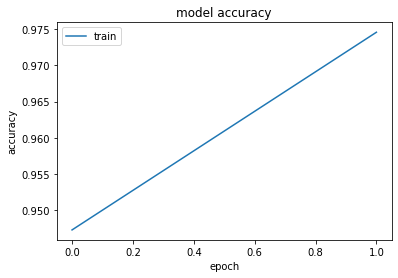

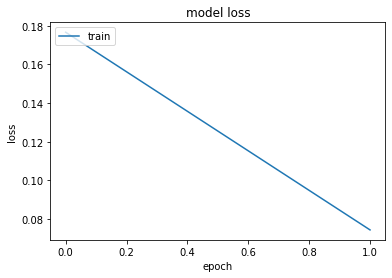

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/tmpqjunist7/assets


In [ ]:
# Simpan model dalam format TF-Lite
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)